In [3]:
import sklearn
import numpy as np

In [4]:
import pandas as pd

In [11]:
crypto_df = pd.read_csv('/Users/ianbick/Downloads/coinbaseUSD.csv',names=['timestamp','price','someshit'])

In [12]:
crypto_df.head()

,timestamp,price,someshit
0,1417412036,300.0,0.010000
1,1417412423,300.0,0.010000
2,1417415048,370.0,0.010000
3,1417416612,370.0,0.026556
4,1417498166,377.0,0.010000


In [13]:
crypto_df['time'] = pd.to_datetime(crypto_df['timestamp'])

In [23]:
crypto_df.head()

,timestamp,price,someshit,time
0,1417412036,300.0,0.010000,1970-01-01 00:00:01.417412036
1,1417412423,300.0,0.010000,1970-01-01 00:00:01.417412423
2,1417415048,370.0,0.010000,1970-01-01 00:00:01.417415048
3,1417416612,370.0,0.026556,1970-01-01 00:00:01.417416612
4,1417498166,377.0,0.010000,1970-01-01 00:00:01.417498166


In [16]:
from matplotlib import pyplot as plt

In [17]:
%matplotlib inline

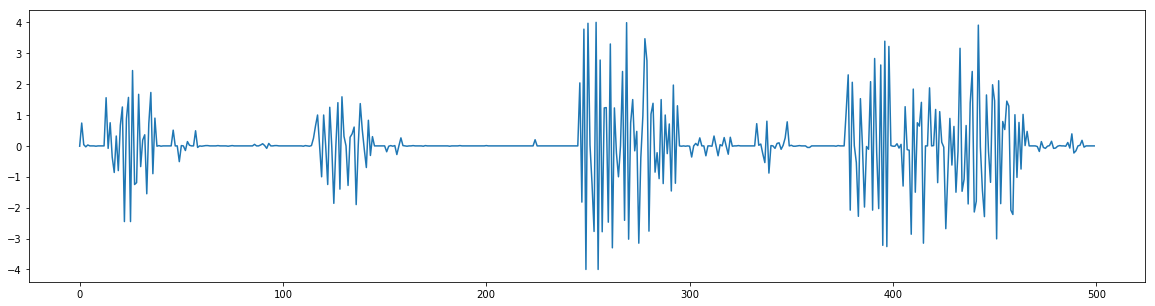

In [34]:
plt.figure(figsize=(20,5))
plt.plot(np.diff(crypto_df['price'])[-500:])

In [59]:
batchsize=60*60
data = crypto_df['price'].values#np.squeeze(np.diff(crypto_df['price']))

In [60]:
data.shape

(18192817,)

In [57]:
ffts_by_day = [[],[]]
for i in range(int(crypto_df.shape[0]/batchsize)):
    f = np.fft.fft(data[i*batchsize:(i+1)*batchsize])
    mag = np.abs(f)
    phase = np.angle(f)
    ffts_by_day[0].append(mag)
    ffts_by_day[1].append(phase)

In [ ]:
hourly_max,hourly_min = [],[]
for i in range(int(crypto_df.shape[0]/batchsize)):
    f = np.fft.fft(data[i*batchsize:(i+1)*batchsize])
    mag = np.abs(f)
    phase = np.angle(f)
    ffts_by_day[0].append(mag)
    ffts_by_day[1].append(phase)

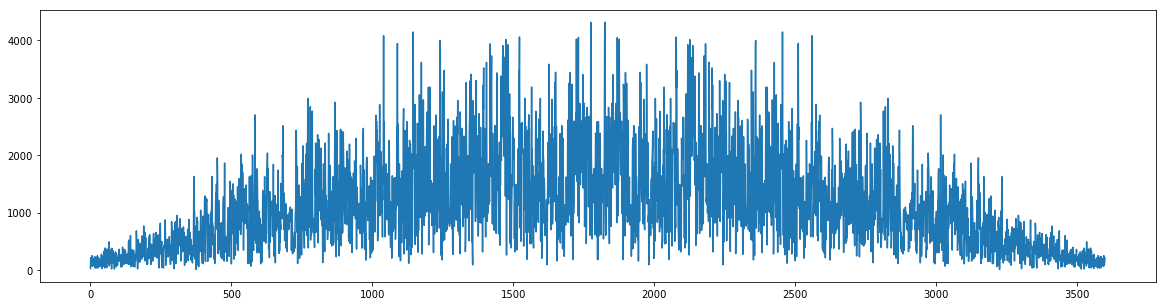

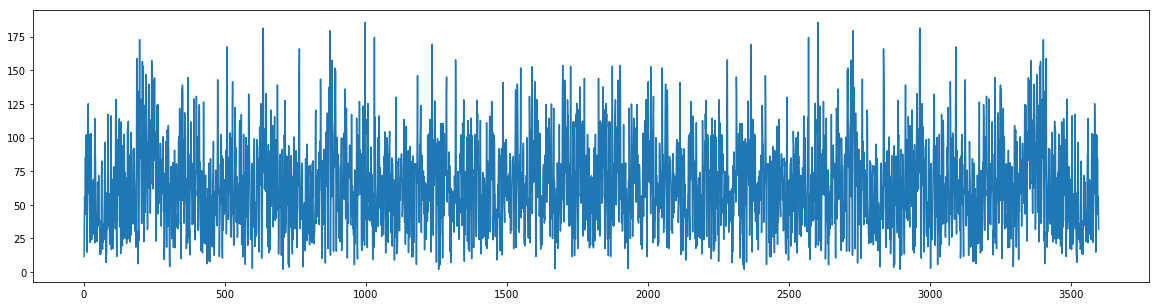

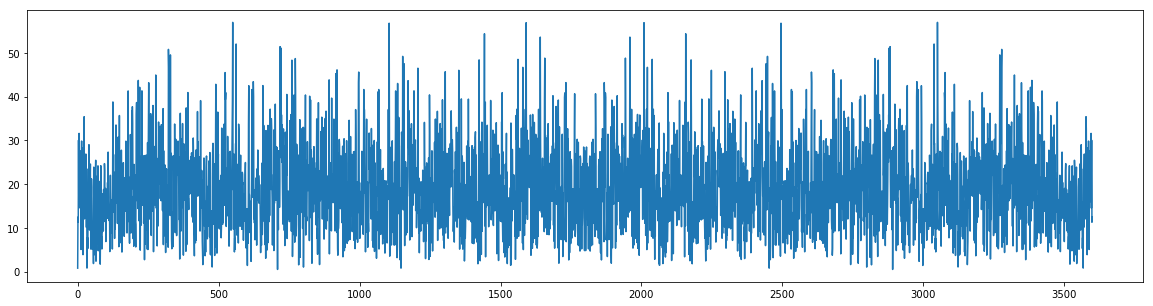

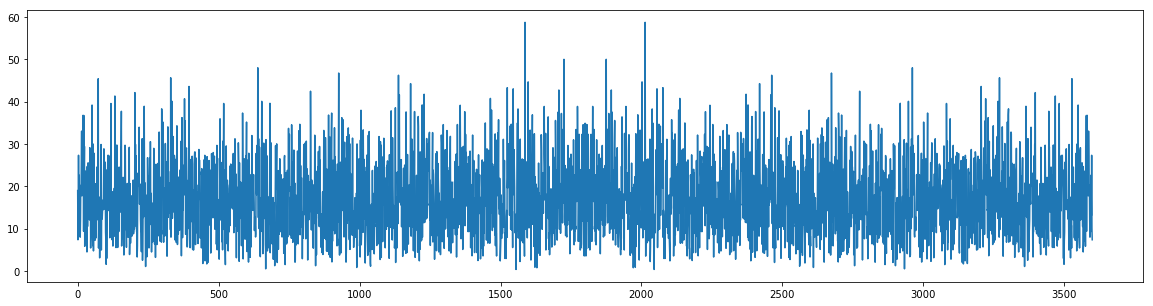

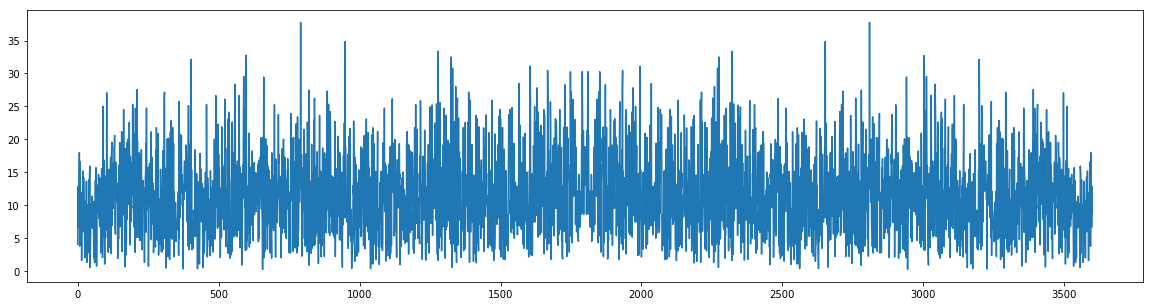

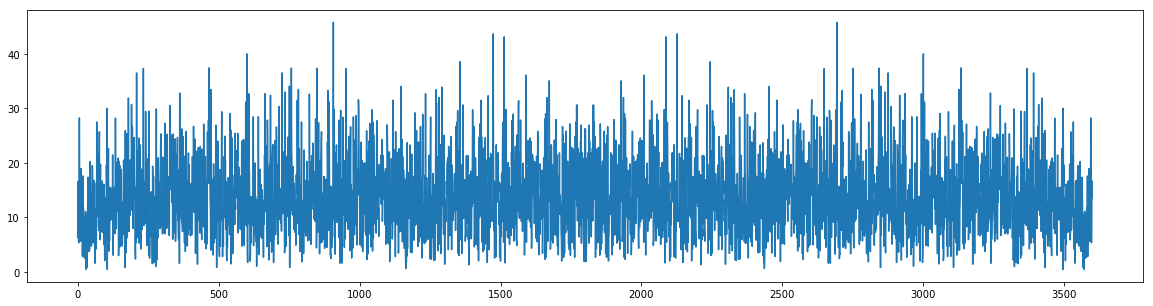

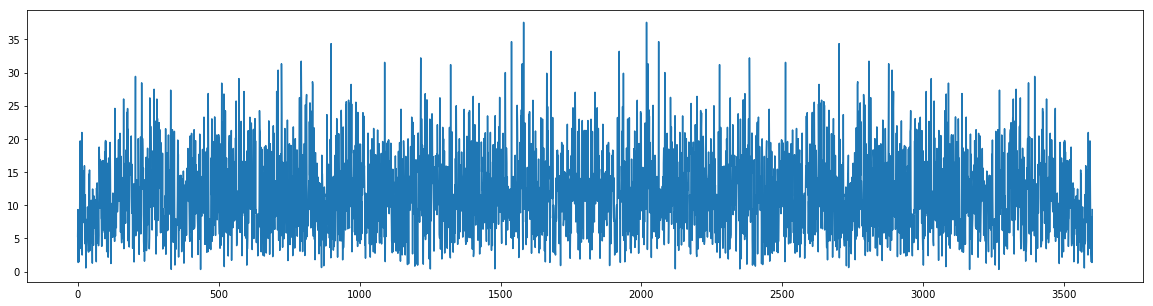

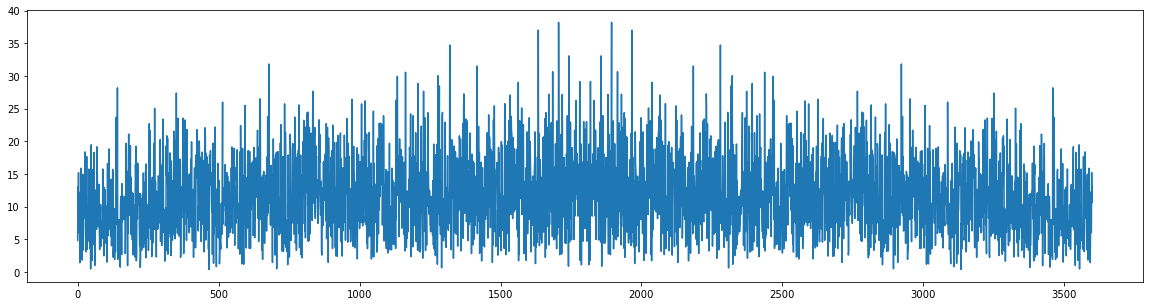

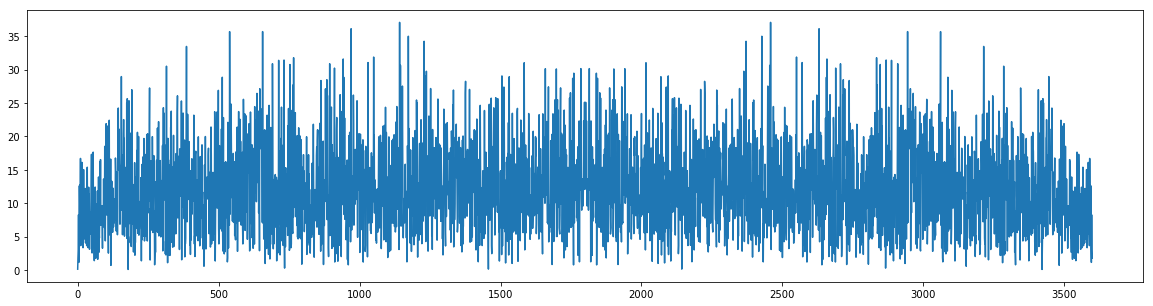

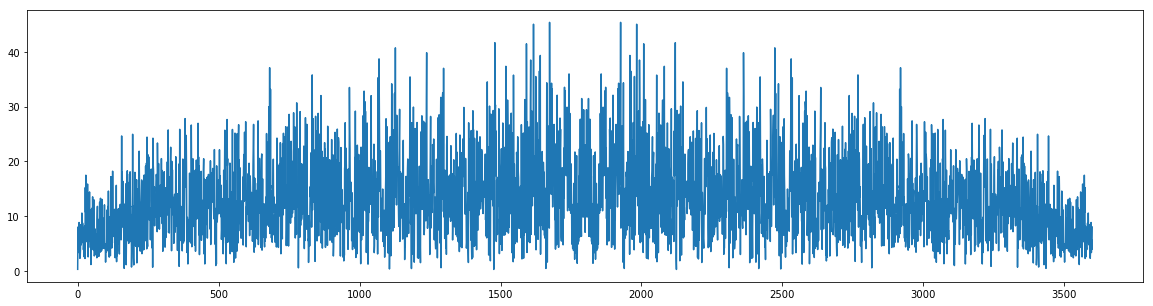

In [58]:
for i in range(10):
    plt.figure(figsize=(20,5))
    plt.plot(ffts_by_day[0][i])

210